In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Normalize data with 

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,)),  # mean value = 0.1307, standard deviation value = 0.3081
])


## Use Mnist train as test and vice versa

In [4]:
data_path = './MNIST'

data_test   = datasets.MNIST(root = data_path, train= True, download=True, transform= transform)
data_train  = datasets.MNIST(root = data_path, train= False, download=True, transform= transform)


In [5]:
print("the number of your training data (must be 10,000) = ", data_train.__len__())
print("hte number of your testing data (must be 60,000) = ", data_test.__len__())


the number of your training data (must be 10,000) =  10000
hte number of your testing data (must be 60,000) =  60000


## Desigining Model
##### design a neural network architecture with three layers (input layer, one hidden layer and output layer)
##### the input dimension of the input layer should be 784 (28 * 28)
##### the output dimension of the output layer should be 10 (class of digits)
##### all the layers should be fully connected layers

##### use any type of activation functions

In [6]:
class classification(nn.Module):
    def __init__(self):
        super(classification, self).__init__()
        
        # construct layers for a neural network
        self.classifier1 = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=20*20),
            nn.Re(),
        ) 
        self.classifier2 = nn.Sequential(
            nn.Linear(in_features=20*20, out_features=10*10),
            nn.Sigmoid(),
        ) 
        self.classifier3 = nn.Sequential(
            nn.Linear(in_features=10*10, out_features=10),
            nn.LogSoftmax(dim=1),
        ) 
        
        
    def forward(self, inputs):                 # [batchSize, 1, 28, 28]
        x = inputs.view(inputs.size(0), -1)    # [batchSize, 28*28]
        x = self.classifier1(x)                # [batchSize, 20*20]
        x = self.classifier2(x)                # [batchSize, 10*10]
        out = self.classifier3(x)              # [batchSize, 10]
        
        return out


## Loss function - cross entropy

In [7]:
criterion = nn.NLLLoss()

## Optimization
#### use any stochastic gradient descent algorithm for the optimization
#### use any size of the mini-batch
#### use any optimization algorithm (for example, Momentum, AdaGrad, RMSProp, Adam)
#### use any regularization algorithm (for example, Dropout, Weight Decay)
#### use any annealing scheme for the learning rate (for example, constant, decay, staircase)

In [8]:
device="cuda"
learning_rate_value=0.01
classifier = classification().to(device)
#
optimizer = torch.optim.adam(classifier.parameters(), lr=learning_rate_value)


In [14]:
#start training with batchsize 32

classifier = classification().to("cuda")
optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
criterion = nn.NLLLoss()
batch_size=32
epoch = 5
loss_train_arr=np.zeros(epoch)
accuracy_train_arr=np.zeros(epoch)
loss_test_arr=np.zeros(epoch)
accuracy_test_arr=np.zeros(epoch)

batched_train = torch.utils.data.DataLoader(training_set, 32, shuffle=True)
test = torch.utils.data.DataLoader(testing_set)

for i in range(epoch):
    
    loss_train=0
    accuracy_train=0
    
    classifier.train()
    #train and compute loss, accuracy
    for img, label in batched_train:
        img=img.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        predicted = classifier(img)

        label_predicted = torch.argmax(predicted,dim=1)
        loss = criterion(predicted, label)
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item()
        accuracy_train += torch.sum(label_predicted==label)
        
    loss_train_arr[i]=loss_train/(len(batched_train)) #number of batch
    accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)
 
    #test, no need to backward, step
    loss_test=0
    accuracy_test=0
    
    classifier.eval()
    for img, label in test:
        img=img.to(device)
        label=label.to(device)
        
        with torch.autograd.no_grad():
        
            predicted = classifier(img)
            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)
            loss_test += loss.item()
            accuracy_test += torch.sum(label_predicted==label)
        
    loss_test_arr[i]=loss_test/len(test.dataset)
    accuracy_test_arr[i]=accuracy_test/len(test.dataset)

    
    
    
    if i%5==0:
        print("train loss", loss_train_arr[i])
        print("train accuracy: ",accuracy_train_arr[i])
        print("test loss", loss_test_arr[i])
        print("test accuracy", accuracy_test_arr[i])
    
    

train loss 2.1719877595265706
train accuracy:  0.3192000091075897
test loss 1.8543883478581906
test accuracy 0.5579000115394592


In [16]:
import time
def startTraining(batch_size,epoch,learning_rate_value):
    #start training with batchsize 32
    start_time = time.time()
    print("start training for batch size ",batch_size)
    
    classifier = classification().to("cuda")
    optimizer = torch.optim.SGD(classifier.parameters(), lr=learning_rate_value)
    criterion = nn.NLLLoss()
    
    #define array to save values
    
    loss_train_arr=np.zeros(epoch)
    accuracy_train_arr=np.zeros(epoch)
    loss_test_arr=np.zeros(epoch)
    accuracy_test_arr=np.zeros(epoch)

    batched_train = torch.utils.data.DataLoader(training_set, batch_size, shuffle=True)
    batched_test = torch.utils.data.DataLoader(testing_set, batch_size, shuffle=True)

    for i in range(epoch):
        
        loss_train=0
        accuracy_train=0
        loss_test=0
        accuracy_test=0
        
        
        classifier.train()
        #train and compute loss, accuracy
        for img, label in batched_train:
            img=img.to(device)
            label=label.to(device)
            optimizer.zero_grad()
            predicted = classifier(img)

            label_predicted = torch.argmax(predicted,dim=1)
            loss = criterion(predicted, label)
            loss.backward()
            optimizer.step()

            loss_train += loss.item()
            accuracy_train += torch.sum(label_predicted==label)


        loss_train_arr[i]=loss_train/(len(batched_train)) 
        accuracy_train_arr[i]=accuracy_train/len(batched_train.dataset)
        
        classifier.eval()
        #test, no need to backward, step
        for img, label in batched_test:
            img=img.to(device)
            label=label.to(device)
            
            with torch.autograd.no_grad():
                predicted = classifier(img)
                label_predicted = torch.argmax(predicted,dim=1)
                loss = criterion(predicted, label)

                loss_test += loss.item()
                accuracy_test += torch.sum(label_predicted==label)

        loss_test_arr[i]=loss_test/(len(batched_test))
        accuracy_test_arr[i]=accuracy_test/len(batched_test.dataset)

        

        if i%10==0:
            print("epoch ",i)
            print("train loss", loss_train_arr[i],"train accuracy: ",accuracy_train_arr[i])
            print("test loss", loss_test_arr[i],"test accuracy", accuracy_test_arr[i])
    print("execution time =======", time.time()-start_time)
    
    return loss_train_arr, loss_test_arr, accuracy_train_arr, accuracy_test_arr


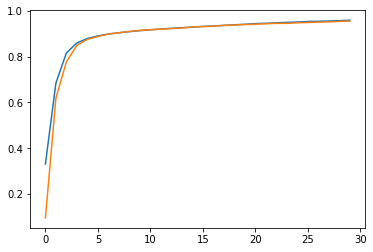

In [28]:
plt.plot(accuracy_train_arr)
plt.plot(accuracy_test_arr)


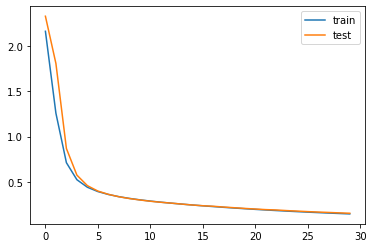

In [31]:
plt.plot(loss_train_arr,label="train")
plt.plot(loss_test_arr,label="test")
plt.legend()

0.14536274313529332

In [31]:
loss_train_32,loss_test_32,acc_train_32,acc_test_32 = startTraining(32,60,0.05)
loss_train_64,loss_test_64,acc_train_64,acc_test_64 = startTraining(64,60,0.05)
loss_train_128,loss_test_128,acc_train_128,acc_test_128 = startTraining(128,60,0.05)

start training for batch size  32
epoch  0
train loss 1.0349324207584063 train accuracy:  0.6935999989509583
test loss 0.40432407702215184 test accuracy 0.887999951839447
epoch  10
train loss 0.09017946650708715 train accuracy:  0.9742833375930786
test loss 0.10008091495161096 test accuracy 0.9702000021934509
epoch  20
train loss 0.03517951817692568 train accuracy:  0.9917833209037781
test loss 0.06523732103730222 test accuracy 0.9788999557495117
epoch  30
train loss 0.014804728270384173 train accuracy:  0.9982500076293945
test loss 0.0583355656290165 test accuracy 0.981499969959259
epoch  40
train loss 0.007119090424090003 train accuracy:  0.9995666742324829
test loss 0.05650404874623505 test accuracy 0.9840999841690063
epoch  50
train loss 0.004127299899219845 train accuracy:  0.9998999834060669
test loss 0.05733557538560461 test accuracy 0.9836999773979187
execution time ======= 982.957777261734
start training for batch size  64
epoch  0
train loss 1.5576405116617045 train accuracy:

[]

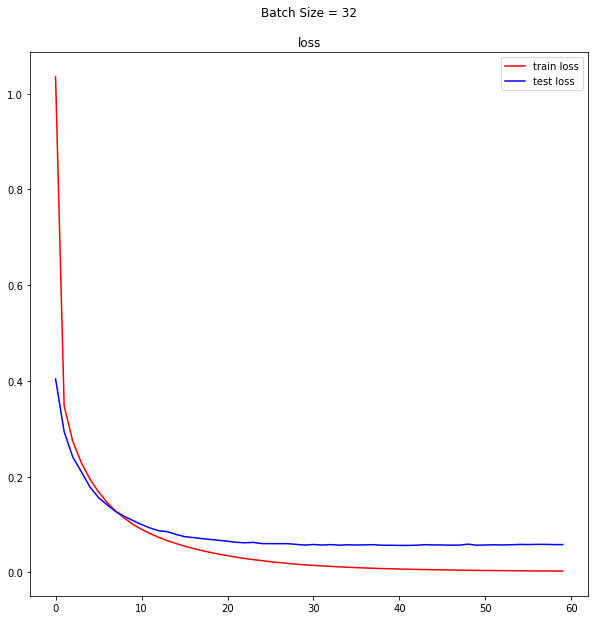

In [32]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_32,label="train loss",c="red")
plt.plot(loss_test_32,label="test loss",c="blue")
plt.title("Batch Size = 32\n\nloss")
plt.legend()
plt.plot()

[]

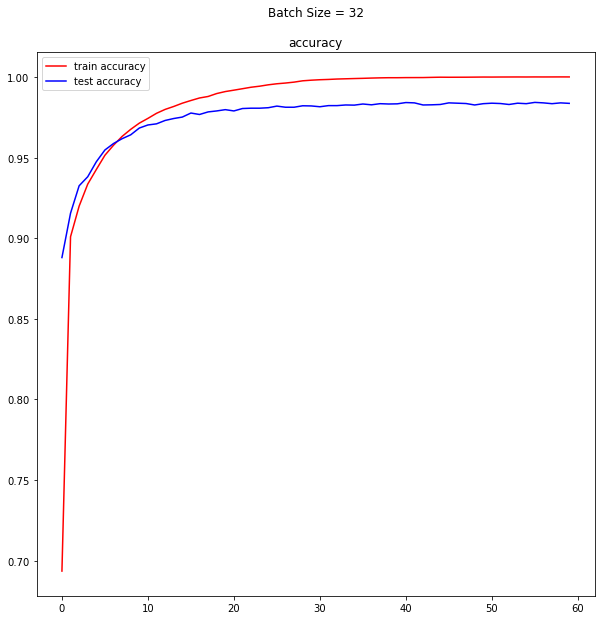

In [33]:
plt.figure(1,figsize=(10,10))

plt.plot(acc_train_32,label="train accuracy",c="red")
plt.plot(acc_test_32,label="test accuracy",c="blue")
plt.title("Batch Size = 32\n\naccuracy")
plt.legend()
plt.plot()

In [34]:
print("mini-batch size   32   64  128")
print("training loss  ",loss_train_32[59].round(2),loss_train_64[59].round(2),loss_train_128[59].round(2))
print("testing loss   ",loss_test_32[59].round(2),loss_test_64[59].round(2),loss_test_128[59].round(2))

mini-batch size   32   64  128
training loss   0.0 0.01 0.05
testing loss    0.06 0.06 0.08


In [35]:
print("mini-batch size   32   64  128")
print("training accuracy  ",acc_train_32[59].round(2),acc_train_64[59].round(2),acc_train_128[59].round(2))
print("testing accuracy   ",acc_test_32[59].round(2),acc_test_64[59].round(2),acc_test_128[59].round(2))

mini-batch size   32   64  128
training accuracy   1.0 1.0 0.99
testing accuracy    0.98 0.98 0.98


# Outputs

# 1. Plot the training and testing losses with a batch size of 32 [4pt]

[]

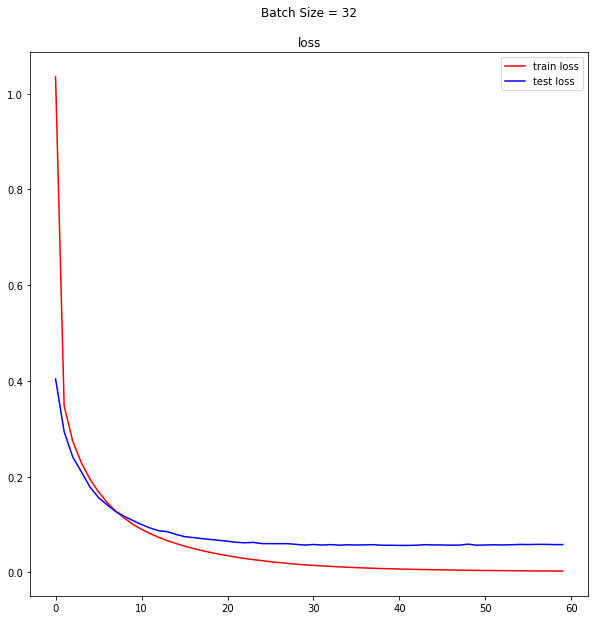

In [36]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_32,label="train loss",c="red")
plt.plot(loss_test_32,label="test loss",c="blue")
plt.title("Batch Size = 32\n\nloss")
plt.legend()
plt.plot()

# 2. Plot the training and testing accuracies with a batch size of 32 [4pt]

[]

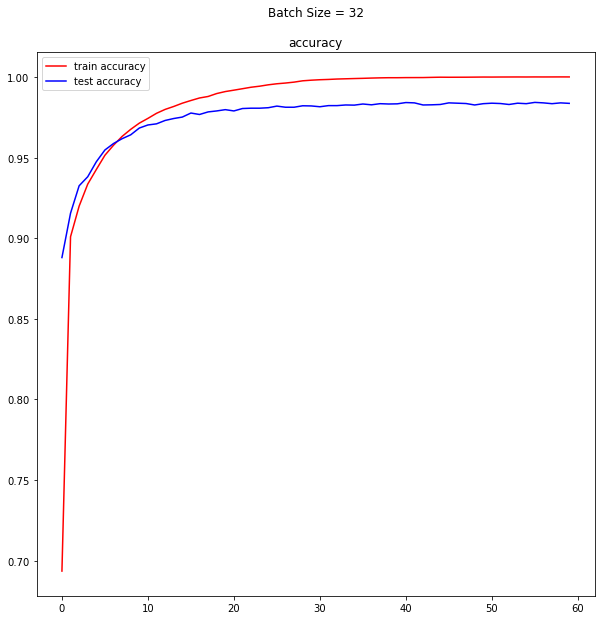

In [37]:
plt.figure(1,figsize=(10,10))

plt.plot(acc_train_32,label="train accuracy",c="red")
plt.plot(acc_test_32,label="test accuracy",c="blue")
plt.title("Batch Size = 32\n\naccuracy")
plt.legend()
plt.plot()

# 3. Plot the training and testing losses with a batch size of 64 [4pt]

[]

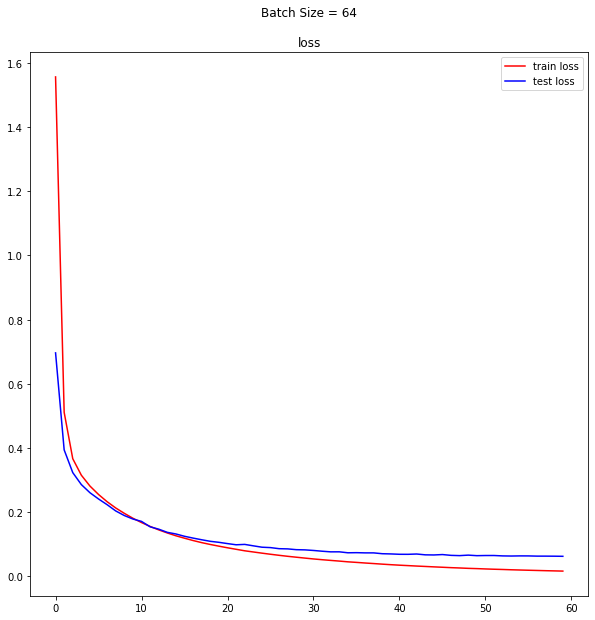

In [38]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_64,label="train loss",c="red")
plt.plot(loss_test_64,label="test loss",c="blue")
plt.title("Batch Size = 64\n\nloss")
plt.legend()
plt.plot()

# 4. Plot the training and testing accuracies with a batch size of 64 [4pt]

[]

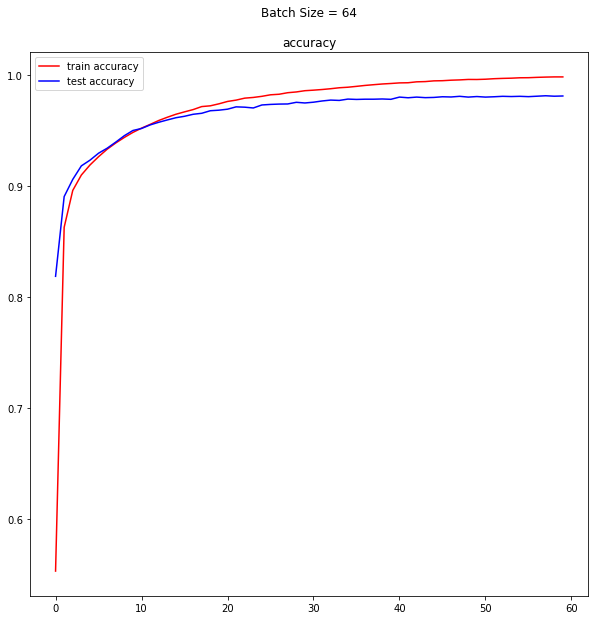

In [39]:
plt.figure(1,figsize=(10,10))

plt.plot(acc_train_64,label="train accuracy",c="red")
plt.plot(acc_test_64,label="test accuracy",c="blue")
plt.title("Batch Size = 64\n\naccuracy")
plt.legend()
plt.plot()

# 5. Plot the training and testing losses with a batch size of 128 [4pt]

[]

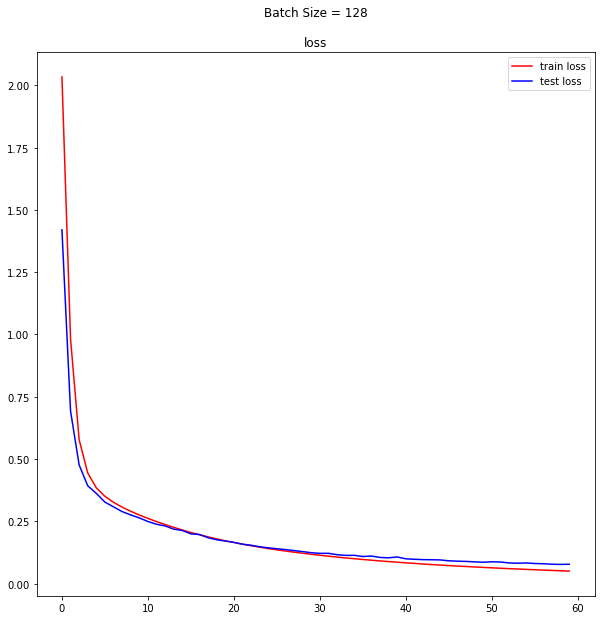

In [40]:
plt.figure(1,figsize=(10,10))

plt.plot(loss_train_128,label="train loss",c="red")
plt.plot(loss_test_128,label="test loss",c="blue")
plt.title("Batch Size = 128\n\nloss")
plt.legend()
plt.plot()

# 6. Plot the training and testing accuracies with a batch size of 128 [4pt]


[]

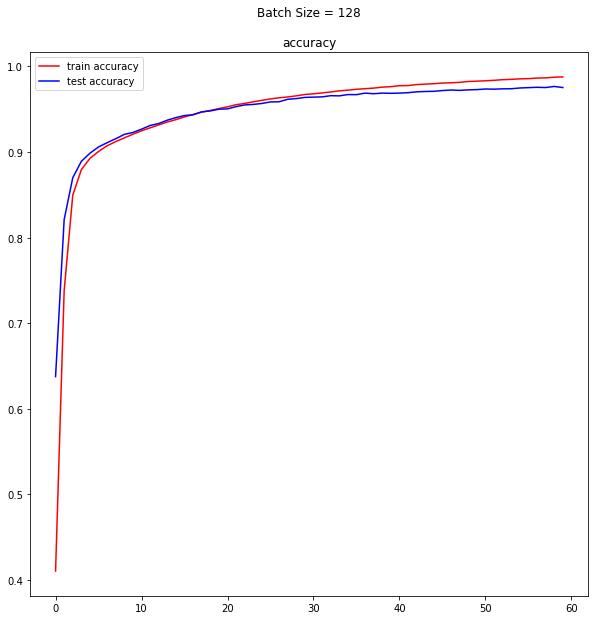

In [41]:
plt.figure(1,figsize=(10,10))

plt.plot(acc_train_128,label="train accuracy",c="red")
plt.plot(acc_test_128,label="test accuracy",c="blue")
plt.title("Batch Size = 128\n\naccuracy")
plt.legend()
plt.plot()

# 7. Print the loss at convergence with different mini-batch sizes [3pt]

In [45]:
print("mini-batch size   32   64  128")
print("training loss  ",loss_train_32[59].round(3),loss_train_64[59].round(3),loss_train_128[59].round(3))
print("testing loss   ",loss_test_32[59].round(3),loss_test_64[59].round(3),loss_test_128[59].round(3))

mini-batch size   32   64  128
training loss   0.003 0.014 0.05
testing loss    0.058 0.06 0.077


# 8. Print the accuracy at convergence with different mini-batch sizes [3pt]

In [47]:
print("mini-batch size      32   64  128")
print("training accuracy  ",acc_train_32[59].round(3),acc_train_64[59].round(3),acc_train_128[59].round(3))
print("testing accuracy   ",acc_test_32[59].round(3),acc_test_64[59].round(3),acc_test_128[59].round(3))

mini-batch size      32   64  128
training accuracy   1.0 0.998 0.988
testing accuracy    0.984 0.981 0.975
